In [20]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install pillow
!pip install transformers
!pip install tf-keras
!pip install sentencepiece
!pip install streamlit



  Using cached packaging-23.2-py3-none-any.whl.metadata (3.2 kB)


Using cached packaging-23.2-py3-none-any.whl (53 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [2]:
!pip install --upgrade sentencepiece



In [21]:

import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # Changed: Directly imported load_img and img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import MarianMTModel, MarianTokenizer


In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(1024, activation='relu')(x)  
predictions = Dense(15, activation='softmax')(x) 


model = Model(inputs=base_model.input, outputs=predictions)


In [6]:

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,585,103 (13.68 MB)

 Trainable params: 3,550,991 (13.55 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [7]:
# Define the path to save the model
model_save_path = 'plant_disease_model_mobilenetv2.h5'

In [8]:
for layer in base_model.layers:
    layer.trainable = False  #here i have frozen the layers


In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training and validation split
datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
    validation_split=0.2   
)


In [11]:
# Path to the dataset
dataset_dir = 'PlantVillage'

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),          # Resize all images to 224x224 (VGG16 input size)
    batch_size=32,                   # Batch size
    class_mode='categorical',        # Multiple classes
    subset='training'                # Set for training data
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'              # Set for validation data
)


Found 7254 images belonging to 15 classes.
Found 1808 images belonging to 15 classes.


In [12]:

# Check the class indices mapping for confirmation
print(train_generator.class_indices)

{'BlackGram Anthracnose ': 0, 'BlackGram Healthy ': 1, 'BlackGram Leaf Crinckle ': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Rice___Brown_Spot': 5, 'Rice___Healthy': 6, 'Sugarcane_Bacterial Blight': 7, 'Sugarcane_Healthy': 8, 'Sugarcane_Red Rot': 9, 'Tomato__Tomato_mosaic_virus': 10, 'Tomato_healthy': 11, 'Wheat___Brown_Rust': 12, 'Wheat___Healthy': 13, 'Wheat___Yellow_Rust': 14}


In [13]:
 # Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size
    )

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.8298 - loss: 0.5772 - val_accuracy: 0.9068 - val_loss: 0.2510
Epoch 2/10
  1/226 ━━━━━━━━━━━━━━━━━━━━ 1:52 500ms/step - accuracy: 0.9688 - loss: 0.0853

/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0853 - val_accuracy: 0.9375 - val_loss: 0.1789
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.9479 - loss: 0.1495 - val_accuracy: 0.9163 - val_loss: 0.2675
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.1930 - val_accuracy: 0.8750 - val_loss: 0.4018
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.9498 - loss: 0.1290 - val_accuracy: 0.9280 - val_loss: 0.2335
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.0696 - val_accuracy: 1.0000 - val_loss: 0.0642
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9579 - loss: 0.1052 - val_accuracy: 0.9163 - val_loss: 0.2512
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2847 - val_accuracy: 0.8750 - val_loss: 0.4226
Epoch 9/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 236s 1s/step - accuracy: 0.9591 - loss: 0.1060 - val_accuracy: 0.9247 - 

#no way

In [14]:
# Save the trained model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to plant_disease_model_mobilenetv2.h5


In [15]:

# Load the saved model
loaded_model = load_model(model_save_path)
print("Model loaded successfully")

Model loaded successfully


In [22]:
# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Load and resize image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to fit model input shape
    img_array /= 255.0  # Rescale pixel values to 0-1
    return img_array

# Function to display image and predictions
def display_image_and_prediction(model, image_path, class_labels):
    # Preprocess image
    img_array = load_and_preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get predicted class index
    
    # Display image
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    
    # Get actual class from the file path (parent folder of the image)
    actual_class = os.path.basename(os.path.dirname(image_path))
    
    # Display predicted and actual class
    plt.title(f"Actual: {actual_class}, Predicted: {class_labels[predicted_class]}")
    plt.show()
    
     # Display predicted and actual class
    st.image(image_path, caption=f"Actual: {actual_class}, Predicted: {class_labels[predicted_class]}", use_column_width=True)

    #result = disease_description("class_labels[predicted_class]", "Hindi")
    #print(result)

# Function to randomly select an image from the dataset
def get_random_image(directory):
    class_folder = random.choice(os.listdir(directory))  # Select random class folder
    class_folder_path = os.path.join(directory, class_folder)
    image_file = random.choice(os.listdir(class_folder_path))  # Select random image file
    image_path = os.path.join(class_folder_path, image_file)
    return image_path


In [17]:

# Function to randomly select an image from the dataset
def get_random_image(directory):
    # Filter out non-directory files (e.g., '.DS_Store')
    class_folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    
    class_folder = random.choice(class_folders)  # Select random class folder
    class_folder_path = os.path.join(directory, class_folder)
    
    image_file = random.choice(os.listdir(class_folder_path))  # Select random image file
    image_path = os.path.join(class_folder_path, image_file)
    
    return image_path


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


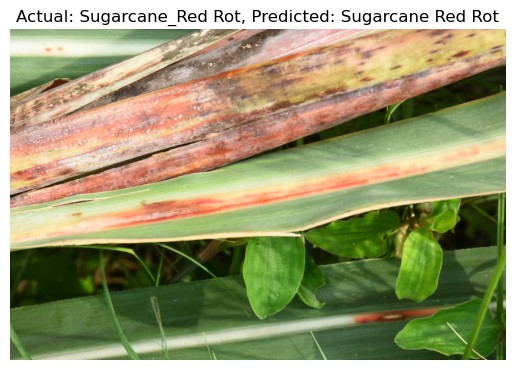

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


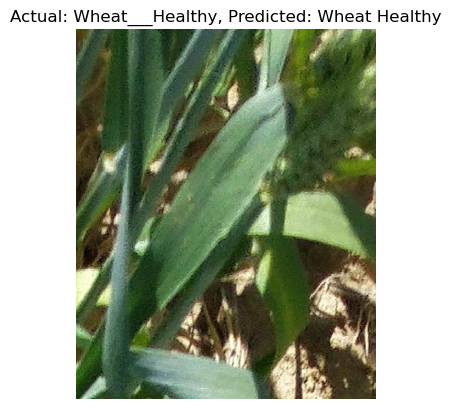

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


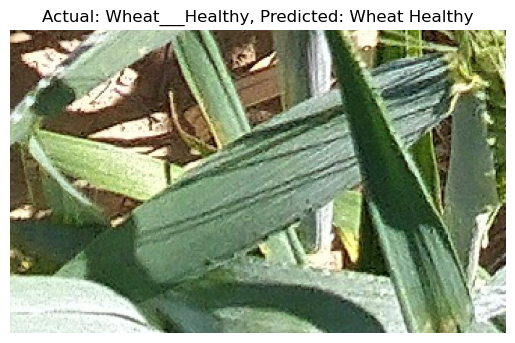

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


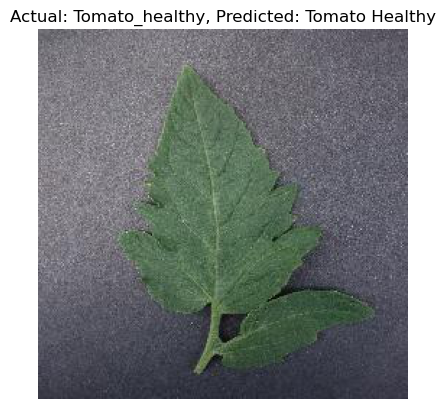

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


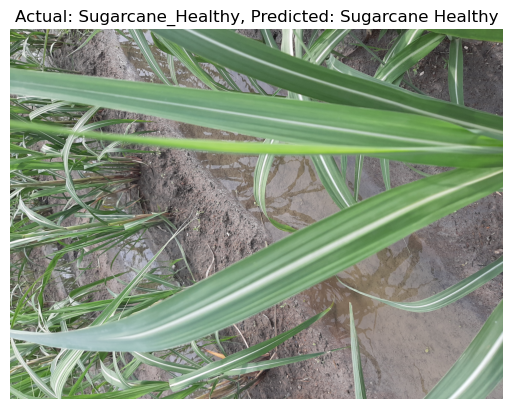

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


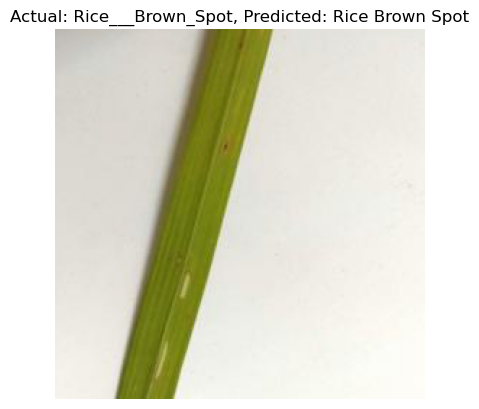

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


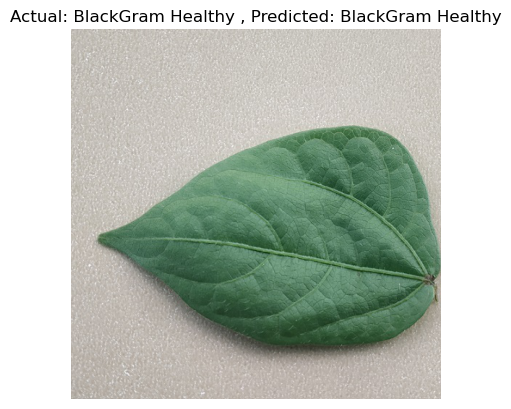

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


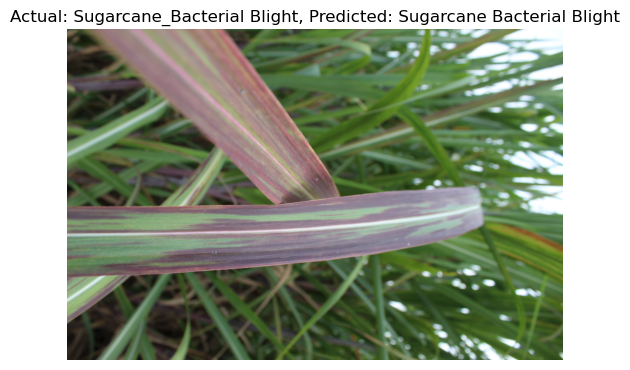

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


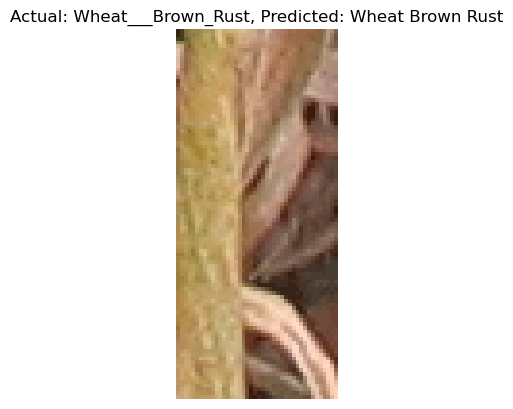

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


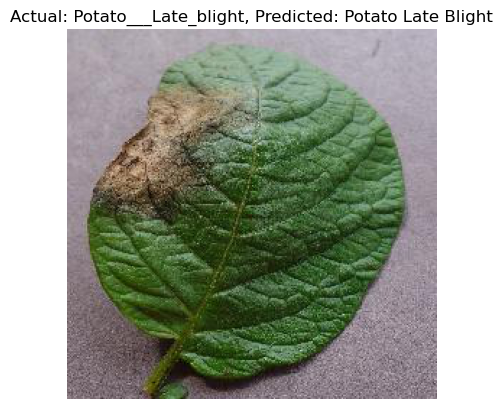

In [19]:

# Define the class labels in the order they were used in training
class_labels = [
    'BlackGram Anthracnose', 
    'BlackGram Healthy', 
    'BlackGram Leaf Crinckle', 
    'Potato Late Blight', 
    'Potato Healthy', 
    'Rice Brown Spot', 
    'Rice Healthy', 
    'Sugarcane Bacterial Blight', 
    'Sugarcane Healthy', 
    'Sugarcane Red Rot', 
    'Tomato Mosaic Virus', 
    'Tomato Healthy', 
    'Wheat Brown Rust', 
    'Wheat Healthy', 
    'Wheat Yellow Rust'
]


# Path to the dataset
dataset_dir = 'PlantVillage'

# Test the model on 5 random images
for i in range(10):
    random_image_path = get_random_image(dataset_dir)
    display_image_and_prediction(model, random_image_path, class_labels)